## 국내외 사이트
* [NullFull/awesome-nCoV-korea: 2020년 코로나바이러스 대유행 정보 시각화를 시도한 국내외 사이트를 취합합니다.](https://github.com/NullFull/awesome-nCoV-korea)

* [코로나19(COVID-19) 실시간 상황판](https://wuhanvirus.kr/)

* [코로나19 맵](https://livecorona.co.kr/)

* [CSSEGISandData/COVID-19: Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)


## 라이브러리 로드하기

In [144]:
import pandas as pd
import numpy as np

## 클립보드에서 데이터 불러오기

*  위키문서의 데이터를 불러옵니다.
https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%BD%94%EB%A1%9C%EB%82%98%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4%EA%B0%90%EC%97%BC%EC%A6%9D-19_%EC%9C%A0%ED%96%89

In [191]:
# 복사한 데이터를 클립보드에서 가져옵니다.
raw = pd.read_clipboard()
raw.head()

,연도,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,2020년,1월,20일,1명,(+1),0명,0명,None
1,1월,24일,2명,(+1),None,None,None,None
2,1월,26일,3명,(+1),None,None,None,None
3,1월,27일,4명,(+1),None,None,None,None
4,1월,30일,6명,(+2),None,None,None,None


In [113]:
# 병합된 데이터의 컬럼이 밀려있습니다.
# 필요없는 데이터를 제거하고 마지막에 None을 추가합니다.
row = raw.loc[0].to_list()
print(len(row))
# 맨 앞에 2020년을 슬라이싱으로 제거
row_0 = row[1:]
print("제거한 행의 길이 : " ,len(row_0))
# list의 append로 마지막 원소를 추가
row_0.append(None)
print(len(row_0))
row_0

8
제거한 행의 길이 :  7
8


['1월', '20일', '1명', '(+1)', '0명', '0명', None, None]

In [114]:
# 밀린 컬럼을 전처리
raw.loc[0] = row_0
raw.head()

,연도,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,1월,20일,1명,(+1),0명,0명,None,None
1,1월,24일,2명,(+1),None,None,None,None
2,1월,26일,3명,(+1),None,None,None,None
3,1월,27일,4명,(+1),None,None,None,None
4,1월,30일,6명,(+2),None,None,None,None


In [115]:
# 파일로 가져온 데이터를 csv 형태로 저장합니다. 
file_name = "covid19-wiki-daily-table.csv"
raw.to_csv(file_name, index=False)

In [189]:
# 저장한 파일을 읽어옵니다. raw라는 변수에 담아 재사용합니다.
raw = pd.read_csv(file_name)
raw.head()

,연도,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN


In [117]:
# 컬럼이름을 확인합니다.
raw.columns.tolist()

['연도', '날짜', '누적', '확진자', '누적.1', '사망자', '누적.2', '격리해제자']

In [118]:
# rename을 활용해서 "연도" 컬럼을 월로 변경합니다.
raw = raw.rename(columns={"연도":"월"})
raw.head()

,월,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN


In [119]:
# 제대로 변경되었는지 컬럼명을 확인합니다.
raw.columns.tolist()

['월', '날짜', '누적', '확진자', '누적.1', '사망자', '누적.2', '격리해제자']

In [120]:
# ['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자'] 로 컬럼명을 변경합니다.
raw.columns = ['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자']
raw.columns.tolist()

['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자']

In [121]:
# raw 에 들어있는 값을 df로 복사해서 사본을 만듭니다.
df = raw.copy()
df.head()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN


In [122]:
#  tail로 미리보기 합니다.
df.tail()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자
29,2월,28일,"2,337명",(+571),16명,(+3),NaN,NaN
30,2월,29일,"3,150명",(+813),17명,(+1),28명,(+1)
31,3월,1일,"4,212명","(+1,062)",22명,(+5),31명,(+3)
32,3월,2일,"4,812명",(+600),28명,(+6),34명,(+3)
33,3월,3일,"5,328명",(+516),32명,(+4),41명,(+7)


## 전처리
* 숫자 데이터를 다루기 위해 ",", "명" 등의 문자를 제거합니다.

In [123]:
# 월, 날짜, 누적, 누적사망, 누적해제 데이터 수치데이터로 바꾸기
df['월'] = df['월'].str.replace("월","")
df['날짜'] = df['날짜'].str.replace("일","")
df['누적'] = df['누적'].str.replace("명","").str.replace(",","").astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       34 non-null     object
 1   날짜      34 non-null     object
 2   누적      34 non-null     int32 
 3   확진자     34 non-null     object
 4   누적사망    19 non-null     object
 5   사망자     19 non-null     object
 6   누적해제    7 non-null      object
 7   격리해제자   7 non-null      object
dtypes: int32(1), object(7)
memory usage: 2.1+ KB


In [125]:
df['누적사망'] = df['누적사망'].str.replace("명","")
df['누적사망'] = df['누적사망'].fillna(0).astype(int)

In [126]:
df['누적해제'] = df['누적해제'].str.replace("명","")
df['누적해제'] = df['누적해제'].fillna(0).astype(int)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       34 non-null     object
 1   날짜      34 non-null     object
 2   누적      34 non-null     int32 
 3   확진자     34 non-null     object
 4   누적사망    34 non-null     int32 
 5   사망자     19 non-null     object
 6   누적해제    34 non-null     int32 
 7   격리해제자   7 non-null      object
dtypes: int32(3), object(5)
memory usage: 1.9+ KB


### 날짜

* datetime 변환하기
https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

In [128]:
# 월, 날짜 컬럼을 붙여 월일, 연월일 데이터를 만듭니다.
# 월일 컬럼은 월과 날짜를 더해서 구하고 연월일은 2020에 월일을 더해서 만듭니다.
# 연월일 컬럼은 pd.to_datetime 으로 연월일을 datetime형식으로 만듭니다.

df['월일'] = df['월'] + "-" + df['날짜']
df['연월일'] = "2020" + "-" + df["월일"]
df['연월일'] = pd.to_datetime(df['연월일'])
df.tail()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일,연월일
29,2,28,2337,(+571),16,(+3),0,NaN,2-28,2020-02-28
30,2,29,3150,(+813),17,(+1),28,(+1),2-29,2020-02-29
31,3,1,4212,"(+1,062)",22,(+5),31,(+3),3-1,2020-03-01
32,3,2,4812,(+600),28,(+6),34,(+3),3-2,2020-03-02
33,3,3,5328,(+516),32,(+4),41,(+7),3-3,2020-03-03


### 오류 데이터 수정

* 클립보드의 표를 그대로 붙여넣으면 셀이 병합된 곳의 데이터가 밀리게 됩니다. 이런 데이터를 전처리 해줍니다.

In [129]:
# 미리보기를 해서 어떤 데이터가 있는지 확인합니다.

df

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일,연월일
0,1,20,1,(+1),0,0명,0,NaN,1-20,2020-01-20
1,1,24,2,(+1),0,NaN,0,NaN,1-24,2020-01-24
2,1,26,3,(+1),0,NaN,0,NaN,1-26,2020-01-26
3,1,27,4,(+1),0,NaN,0,NaN,1-27,2020-01-27
4,1,30,6,(+2),0,NaN,0,NaN,1-30,2020-01-30
5,1,31,11,(+5),0,NaN,0,NaN,1-31,2020-01-31
6,2,1,12,(+1),0,NaN,0,NaN,2-1,2020-02-01
7,2,2,15,(+3),0,NaN,0,NaN,2-2,2020-02-02
8,2,4,16,(+1),0,NaN,0,NaN,2-4,2020-02-04
9,2,5,19,(+3),1,(+1),0,NaN,2-5,2020-02-05


In [130]:
# "2020-02-10","2020-02-12", "2020-02-15" 격리해제자 컬럼에 확진자 수를 넣어줍니다.

df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]),'누적해제'] = df['누적']
df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]),'누적해제']

13    4
15    7
16    9
Name: 누적해제, dtype: int32

In [132]:
# numpy써라
df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]),'누적'] = pd.np.nan
df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]),'누적']

C:\Users\SWH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


13   NaN
15   NaN
16   NaN
Name: 누적, dtype: float64

In [134]:
# "2020-02-10","2020-02-12", "2020-02-15" 은 확진자를 결측치로 만들어 줍니다.
# "2020-02-22","2020-02-26" 은 사망자를 결측치 처리 합니다.
df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]), '격리해제자'] = df['확진자']
df.loc[df['연월일'].isin(["2020-02-10","2020-02-12", "2020-02-15"]), '격리해제자']

13    (+1)
15    (+3)
16    (+2)
Name: 격리해제자, dtype: object

In [135]:
df.loc[df['연월일'].isin(['2020-02-22', '2020-02-26']),'사망자'] = pd.np.nan

C:\Users\SWH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [136]:
# 모든 날짜가 없기 때문에 first_day, last_day 로 날짜를 만듭니다.
first_day = df.loc[0, '연월일']
# 마지막 행번호 찾기
last_row = df.shape[0] - 1
# 마지막 행의 날짜 가져오기
last_day = df.loc[last_row, '연월일']
last_day

Timestamp('2020-03-03 00:00:00')

In [137]:
# pd.date_range 로 모든 날짜를 다 만듭니다.
# pd.DataFrame 으로 "연월일" 컬럼에 만들어준 날짜를 데이터프레임으로 만듭니다.

days = pd.date_range(first_day, last_day)
days = pd.DataFrame({'연월일':days})
days.tail()

,연월일
39,2020-02-28
40,2020-02-29
41,2020-03-01
42,2020-03-02
43,2020-03-03


In [138]:
# days 와 df를 merge로 합치고 기준은 왼쪽 데이터로 합니다.

df_days = days.merge(df, how='left')
df_days.head()

,연월일,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일
0,2020-01-20,1,20,1.0,(+1),0.0,0명,0.0,NaN,1-20
1,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,1,24,2.0,(+1),0.0,NaN,0.0,NaN,1-24


### 정규표현식으로 문자 전처리 하기

In [139]:
# (+1) 로 확진자 증감을 표시하고 있습니다. 이를 전처리 해서 숫자만 추출합니다.
import re
num = "(+1)"
re.sub("\(\+(?P<num>\d)\)", "\g<num>", num)

'1'

In [140]:
re.sub("\(\+(?P<num>\d)\)", "\g<num>", num)

'1'

In [141]:
# \d => 숫자
# \w => 문자
re.sub("\(\+(?P<num>\w)\)", "\g<num>", "(+a)")

'a'

* 정규표현식 사용방법을 더 알고 싶다면 다음 링크를 참고하면 좋습니다. [07-2 정규 표현식 시작하기 - 점프 투 파이썬](https://wikidocs.net/4308#_2)

In [142]:
# parse_num 이라는 함수를 만들어 숫자만 추출할 수 있도록 합니다.
# 또, 전처리 후에는 데이터의 타입을 int로 변환합니다.

def parse_num(num) :
    if pd.isnull(num) :
        return 0
    num = num.replace(',','')
    result = re.sub("\(\+(?P<num>\d+)\)", "\g<num>", num)
    result = int(result)
    return result

parse_num('(+1062)')

1062

In [147]:
# 2020-02-10 데이터를 결측치로 만들어 줍니다.
df_days.loc[df_days['연월일'] == '2020-02-10', '확진자'] = np.nan
df_days.loc[df_days['연월일'] == '2020-02-12', '확진자'] = np.nan
df_days.loc[df_days['연월일'] == '2020-02-15', '확진자'] = np.nan

In [148]:
# map, apply를 사용하면 함수를 적용할 수 있습니다. 
# 위에서 만든 함수를 확진자 컬럼에 적용합니다. 
# 그리고 확진누적 컬럼을 만들어서 cumsum()을 통해 누적 확진자 수를 계산해 봅니다.

df_days['확진수'] = df_days['확진자'].map(parse_num)
df_days['확진누적'] = df_days['확진수'].cumsum()
df_days[['연월일','확진수','확진누적','확진자','누적']]

,연월일,확진수,확진누적,확진자,누적
0,2020-01-20,1,1,(+1),1.0
1,2020-01-21,0,1,NaN,NaN
2,2020-01-22,0,1,NaN,NaN
3,2020-01-23,0,1,NaN,NaN
4,2020-01-24,1,2,(+1),2.0
5,2020-01-25,0,2,NaN,NaN
6,2020-01-26,1,3,(+1),3.0
7,2020-01-27,1,4,(+1),4.0
8,2020-01-28,0,4,NaN,NaN
9,2020-01-29,0,4,NaN,NaN


In [ ]:
# 사망자 컬럼을 전처리하고 숫자만 추출해서 "사망수"라는 컬럼을 만듭니다.
# 위에서 만든 parse_num 함수로 전처리 합니다.



In [ ]:
# html 테이블 병합으로 연월일 데이터가 제대로 들어가 있지 않습니다. 계산을 위해 
# df_days["연월일"] < "2020-02-20" 에 해당되는 '사망수', '누적사망' 값을 결측치로 만듭니다.



In [ ]:
## cumsum 으로 사망누적 수를 구합니다.



In [ ]:
# df_days["누적fill"] = df_days["누적"].fillna(method="ffill")



## 시각화
### 시각화 도구 불러오기

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font='Malgun Gothic', style='whitegrid')

### 월일 컬럼 만들기

In [155]:
# 시각화에 사용하기 위해 월-일 컬럼을 만듭니다.

# df_days['연월일'].astype(str).map(lambda x : x[-5:])

df_days['월일'] = df_days['연월일'].astype(str).str.replace('2020-','')
df_days.head()

,연월일,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일,확진수,확진누적
0,2020-01-20,1,20,1.0,(+1),0.0,0명,0.0,NaN,01-20,1,1
1,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-21,0,1
2,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-22,0,1
3,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-23,0,1
4,2020-01-24,1,24,2.0,(+1),0.0,NaN,0.0,NaN,01-24,1,2


### 누적 데이터 시각화

In [159]:
# 월일 누적fill 의 pointplot 과 barplot 을 시각화 해봅니다.

df_days['누적fill'] = df_days['누적'].ffill()
df_days[['누적','누적fill']].head(2)

,누적,누적fill
0,1.0,1.0
1,NaN,1.0


In [162]:
# for i, s in enumerate(df_days['확진누적']) :
#     print(i, s)

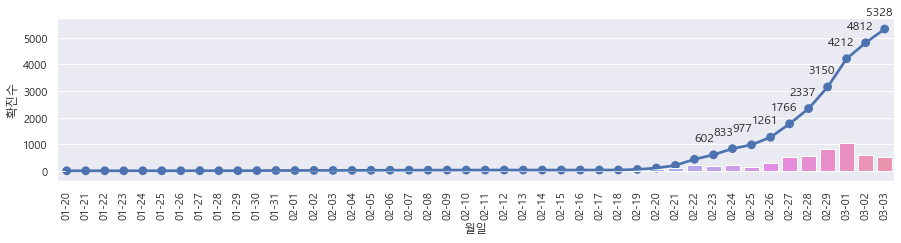

In [168]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
sns.pointplot(data=df_days, x='월일', y='확진누적')
g = sns.barplot(data=df_days, x='월일', y='확진수')
for i, s in enumerate(df_days['확진누적']) :
    if s > 500 :
        g.text(x=i-1, y=s+500, s=s)

In [ ]:
# 월일 사망누적을 pointplot 으로 시각화 합니다.



## 사용하지 않는 컬럼 삭제

In [ ]:
# 누적사망, 날짜 등 사용하지 않는 컬럼은 삭제합니다.



## 지역별 확진자

In [ ]:
# 클립보드로 복사를 하면 원하는 형태로 저장이 되지 않고 병합셀이 밀리는 문제가 있습니다.


### 텍스트데이터 데이터프레임으로 만들기

In [169]:
# 텍스트를 그대로 복사해 옵니다.
copy_text = """지역	확진자 수	신천지대구교회 관련	청도 대남 병원 관련	기준 해외 유입관련	기타
서울	74	4	0	18	52
부산	77	8	2	0	67
대구	2,055	1356	0	697
인천	6	1	0	1	4
광주	9	7	0	1
대전	14	0	0	14
울산	17	8	0	9
세종	1	1	0	0
경기	76	13	0	11	52
강원	7	3	0	4
충북	10	4	0	6
충남	48	0	0	48
전북	5	0	1	4
전남	2	0	0	1
경북	469	133	115	0	221
경남	59	19	0	40
제주	2	0	0	2"""
copy_text

'지역\t확진자 수\t신천지대구교회 관련\t청도 대남 병원 관련\t기준 해외 유입관련\t기타\n서울\t74\t4\t0\t18\t52\n부산\t77\t8\t2\t0\t67\n대구\t2,055\t1356\t0\t697\n인천\t6\t1\t0\t1\t4\n광주\t9\t7\t0\t1\n대전\t14\t0\t0\t14\n울산\t17\t8\t0\t9\n세종\t1\t1\t0\t0\n경기\t76\t13\t0\t11\t52\n강원\t7\t3\t0\t4\n충북\t10\t4\t0\t6\n충남\t48\t0\t0\t48\n전북\t5\t0\t1\t4\n전남\t2\t0\t0\t1\n경북\t469\t133\t115\t0\t221\n경남\t59\t19\t0\t40\n제주\t2\t0\t0\t2'

### 2차원 리스트 형태로 만들기

In [173]:
# 텍스트 데이터를 전처리해서 데이터프레임 형태로 가공합니다.
# split_text 줄바꿈 문자(\n)를 기준으로 텍스트를 나눠주고 나눠준 데이터를 다시 ("\t") 으로 분리합니다.
# 이렇게 만든 데이터를 city_data 라는 리스트에 담습니다.
city_data = []
split_text = copy_text.split('\n')
for city_str in split_text :
    city = city_str.split('\t')
    city_data.append(city)

city_data

[['지역', '확진자 수', '신천지대구교회 관련', '청도 대남 병원 관련', '기준 해외 유입관련', '기타'],
 ['서울', '74', '4', '0', '18', '52'],
 ['부산', '77', '8', '2', '0', '67'],
 ['대구', '2,055', '1356', '0', '697'],
 ['인천', '6', '1', '0', '1', '4'],
 ['광주', '9', '7', '0', '1'],
 ['대전', '14', '0', '0', '14'],
 ['울산', '17', '8', '0', '9'],
 ['세종', '1', '1', '0', '0'],
 ['경기', '76', '13', '0', '11', '52'],
 ['강원', '7', '3', '0', '4'],
 ['충북', '10', '4', '0', '6'],
 ['충남', '48', '0', '0', '48'],
 ['전북', '5', '0', '1', '4'],
 ['전남', '2', '0', '0', '1'],
 ['경북', '469', '133', '115', '0', '221'],
 ['경남', '59', '19', '0', '40'],
 ['제주', '2', '0', '0', '2']]

In [174]:
# 위 리스트에 있는 값을 데이터프레임 형태로 만듭니다.
# df_city 라는 변수에 저장합니다.

df_city = pd.DataFrame(city_data)
df_city.head()

,0,1,2,3,4,5
0,지역,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
1,서울,74,4,0,18,52
2,부산,77,8,2,0,67
3,대구,"2,055",1356,0,697,None
4,인천,6,1,0,1,4


In [178]:
# 0번째 행에 컬럼값이 있습니다. 이 값을 컬럼으로 만듭니다.

col_name = df_city.loc[0].to_list()

df_city.columns = col_name
# 0번 인덱스 행을 삭제합니다.
df_city = df_city.drop(0)
df_city

,지역,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
1,서울,74,4,0,18,52
2,부산,77,8,2,0,67
3,대구,"2,055",1356,0,697,None
4,인천,6,1,0,1,4
5,광주,9,7,0,1,None
6,대전,14,0,0,14,None
7,울산,17,8,0,9,None
8,세종,1,1,0,0,None
9,경기,76,13,0,11,52
10,강원,7,3,0,4,None


In [179]:
# 전처리가 잘 되었는지 확인합니다.
df_city.head()

,지역,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
1,서울,74,4,0,18,52
2,부산,77,8,2,0,67
3,대구,"2,055",1356,0,697,None
4,인천,6,1,0,1,4
5,광주,9,7,0,1,None


In [181]:
# 시각화를 위해 지역을 인덱스로 만듭니다.

df_city = df_city.set_index('지역')
df_city

,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
지역,,,,,
서울,74,4,0,18,52
부산,77,8,2,0,67
대구,"2,055",1356,0,697,None
인천,6,1,0,1,4
광주,9,7,0,1,None
대전,14,0,0,14,None
울산,17,8,0,9,None
세종,1,1,0,0,None
경기,76,13,0,11,52


In [182]:
# info로 전처리한 데이터프레임의 정보를 봅니다.

df_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   확진자 수        17 non-null     object
 1   신천지대구교회 관련   17 non-null     object
 2   청도 대남 병원 관련  17 non-null     object
 3   기준 해외 유입관련   17 non-null     object
 4   기타           5 non-null      object
dtypes: object(5)
memory usage: 816.0+ bytes


In [183]:
# "확진자 수"를 전처리 해서 "확진자" 컬럼에 int형태로 담습니다.

df_city['확진자 수'] = df_city['확진자 수'].str.replace(',','').astype(int)

In [186]:
# df_city["확진자"] 수를 정렬합니다.

df_sort = df_city['확진자 수'].sort_values(ascending=True)

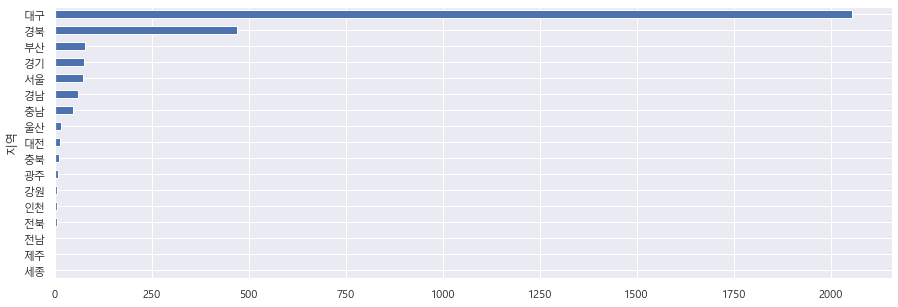

In [188]:
# pandas 의 series 데이터를 plot.barh 로 시각화 합니다.
# 숫자도 함께 표시해 봅니다.

df_sort.plot.barh(figsize=(15,5))

In [ ]:
# sns.set 때문에 seaborn style로 시각화된다.

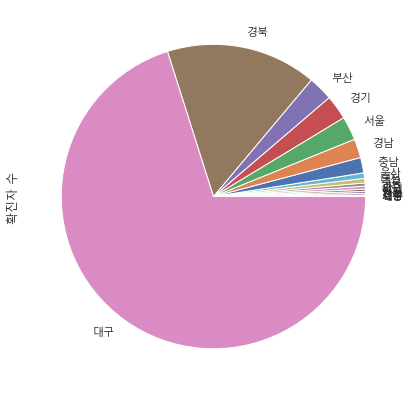

In [192]:
df_sort.plot.pie(figsize=(7,7))